In [2]:
Nx=5;

In [2]:
using PyPlot

In [3]:
function armod(x,y)
    if x>y || x==0 || x<0 
        return mod(x-1,y)+1
    else
        return x
    end
end

armod (generic function with 1 method)

In [3]:
Nb=Nx^2;
Nw=Nb;
N=Nb*2;

In [5]:
unit=transpose([cos(π/6),sin(π/6)]);

a=transpose([2*cos(π/6),0]);
b=[cos(π/6),1+sin(π/6)];

In [6]:
bM=transpose(repeat(b,outer=[1,Nx]))

Xb=Array{Float64}(Nb,2);
Xw=Array{Float64}(Nw,2);

Bondsw=Array{Int16}(Nw,3);
Bondsb=Array{Int16}(Nb,3);

In [7]:
## Creating the positions
for i in 1:Nx
    Xb[i,:]=(i-1)*a;
    Xw[i,:]=unit+(i-1)*a;
end

for j in 2:Ny
    Xb[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xb[1:Nx,:]+(j-1)*bM;
    Xw[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xw[1:Nx,:]+(j-1)*bM;
end

In [8]:
## Creating the bonds
for i in 1:Nb
    Bondsb[i,1]=i;
    Bondsw[i,1]=i;
    Bondsb[i,2]=armod(i-1,Nb);
    Bondsw[i,2]=armod(i+1,Nb);
    Bondsb[i,3]=armod(i-Nx,Nb);
    Bondsw[i,3]=armod(i+Nx,Nw);
end

In [17]:
X1b=zeros(Xb)
X1w=zeros(Xw)
X1b[:,1]=Xb[:,1]-(Ny-1)*b[1];
X1w[:,1]=Xw[:,1]-(Ny-1)*b[1];
X1b[:,2]=Xb[:,2]-Xb[end,2]-1;
X1w[:,2]=Xw[:,2]-Xb[end,2]-1;

In [28]:
rotmat=[[cos(2*π/3) -sin(2*π/3)]
        [sin(2*π/3) cos(2*π/3)]]

2x2 Array{Float64,2}:
 -0.5       -0.866025
  0.866025  -0.5     

In [31]:
X2b=zeros(Xb)
X2w=zeros(Xw)
X2b[:,1]=rotmat[1,1]*X1b[:,1]+rotmat[1,2]*X1b[:,2];
X2w[:,1]=rotmat[1,1]*X1w[:,1]+rotmat[1,2]*X1w[:,2];
X2b[:,2]=rotmat[2,1]*X1b[:,1]+rotmat[2,2]*X1b[:,2];
X2w[:,2]=rotmat[2,1]*X1w[:,1]+rotmat[2,2]*X1w[:,2];

X3b=zeros(Xb)
X3w=zeros(Xw)
X3b[:,1]=rotmat[1,1]*X2b[:,1]+rotmat[1,2]*X2b[:,2];
X3w[:,1]=rotmat[1,1]*X2w[:,1]+rotmat[1,2]*X2w[:,2];
X3b[:,2]=rotmat[2,1]*X2b[:,1]+rotmat[2,2]*X2b[:,2];
X3w[:,2]=rotmat[2,1]*X2w[:,1]+rotmat[2,2]*X2w[:,2];

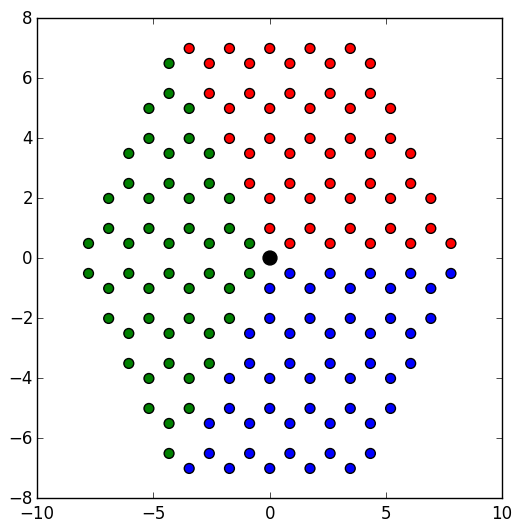

PyObject <matplotlib.collections.PathCollection object at 0x30dd9c350>

In [32]:
# Plot the Positions
if true
    w, h = plt[:figaspect](1)
    figure(figsize=(w,h))
    scatter(0,0,s=100,color="black")
    scatter(X1b[:,1],X1b[:,2],s=50*ones(Xb[:,1]))
    scatter(X1w[:,1],X1w[:,2],s=50*ones(Xw[:,1]))
    
    scatter(X2b[:,1],X2b[:,2],s=50*ones(Xb[:,1]),c="red")
    scatter(X2w[:,1],X2w[:,2],s=50*ones(Xw[:,1]),c="red")
    
    
    scatter(X3b[:,1],X3b[:,2],s=50*ones(Xb[:,1]),c="green")
    scatter(X3w[:,1],X3w[:,2],s=50*ones(Xb[:,1]),c="green")
end

In [ ]:
b

In [ ]:
# plot the bonds
if false
    w, h = plt[:figaspect](.5)
    figure(figsize=(w,h))
    for i in 1:Nb
        #println(Xb[i,1],' ',Bondsb[i,1])
        xx=[Xb[i,1], Xw[Bondsb[i,1],1] ]
        yx=[Xb[i,2], Xw[Bondsb[i,1],2] ]
        plot(xx,yx)
            
        xx=[Xb[i,1], Xw[Bondsb[i,2],1] ]
        yx=[Xb[i,2], Xw[Bondsb[i,2],2] ]
        plot(xx,yx)
    
        #println(i,' ',Bonds[i,3])
        xx=[Xb[i,1], Xw[Bondsb[i,3],1] ]
        yx=[Xb[i,2], Xw[Bondsb[i,3],2] ]
        plot(xx,yx)
    
        xx=[Xw[i,1], Xb[Bondsw[i,1],1] ]
        yx=[Xw[i,2], Xb[Bondsw[i,1],2] ]
        plot(xx,yx)
        
        xx=[Xw[i,1], Xb[Bondsw[i,2],1] ]
        yx=[Xw[i,2], Xb[Bondsw[i,2],2] ]
        plot(xx,yx)

        #println(i,' ',Bonds[i,3])
        xx=[Xw[i,1], Xb[Bondsw[i,3],1] ]
        yx=[Xw[i,2], Xb[Bondsw[i,3],2] ]
        plot(xx,yx)
    end
end

In [ ]:
J=Array{Int8}(Nw,3);
for i in 1:Nw
    for j in 1:3
        J[i,j]=1; 
    end
end

In [ ]:
uw=ones(Int8,Nw,3);
ub=ones(Int8,Nb,3);

A=spzeros(Nw, Nw);
M=spzeros(2*Nw,2*Nw);

In [ ]:
for ii in 1:Nw
    for jj in 1:3
        A[ii,Bondsw[ii,jj]]=J[ii,jj]*uw[ii,jj];
    end
end

In [ ]:
M[(Nw+1):(2*Nw),1:Nw]=A;
M[1:Nw,(Nw+1):(2*Nw)]=A;

In [ ]:
@time (E,V)=eig(full(M));

In [ ]:
#@time (E2,V2,nconv,niter,nmult,resid)=eigs(M,nev=400,which="SM");

In [ ]:
title("Density of States, Isotropic Honeycomb")
plt[:hist](2*abs(E),20);

In [ ]:
plot(sort(abs(E),rev=true))
plot(sort(abs(E2),rev=true))